# 01 - Load and Explore CMAPSS (FD001)

This notebook loads the cleaned CMAPSS dataset, previews rows, computes RUL, and explores feature distributions and correlations.



In [1]:
# Imports and setup
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consistent style
sns.set(style="whitegrid")
np.random.seed(42)

project_root = Path("..").resolve().parents[0] if (Path.cwd().name == "notebooks") else Path(".").resolve().parents[0]
data_dir = Path("../data/CMaps").resolve()

# Ensure cleaned data exists
train_clean = data_dir / "train_cleaned.csv"
if not train_clean.exists():
    # Attempt to run loader if file missing
    %run ../scripts/load_data.py



Saved cleaned train to: C:\Users\Daksh Mehta\OneDrive\Desktop\AkashInsights\data\train_cleaned.csv
Saved cleaned test to:  C:\Users\Daksh Mehta\OneDrive\Desktop\AkashInsights\data\test_cleaned.csv


In [2]:
# Ensure we point to cleaned CSVs under data/, and raw .txts under data/CMaps
from pathlib import Path

data_dir = Path("../data").resolve()
raw_dir = data_dir / "CMaps"

# If cleaned files are missing, run the loader (which reads from data/CMaps and writes to data/)
if not (data_dir / "train_cleaned.csv").exists():
    %run ../scripts/load_data.py


In [3]:
# Load cleaned data
train_df = pd.read_csv(data_dir / "train_cleaned.csv")
test_df = pd.read_csv(data_dir / "test_cleaned.csv")

train_df.head()


,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
# Compute RUL for exploration
max_cycle = train_df.groupby("unit_number")["time_in_cycles"].transform("max")
train_df = train_df.copy()
train_df["RUL"] = (max_cycle - train_df["time_in_cycles"]).astype(int)

print("Rows:", len(train_df))
print("Columns:", list(train_df.columns))
train_df[["unit_number", "time_in_cycles", "RUL"]].head()


Rows: 20631
Columns: ['unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'RUL']


,unit_number,time_in_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


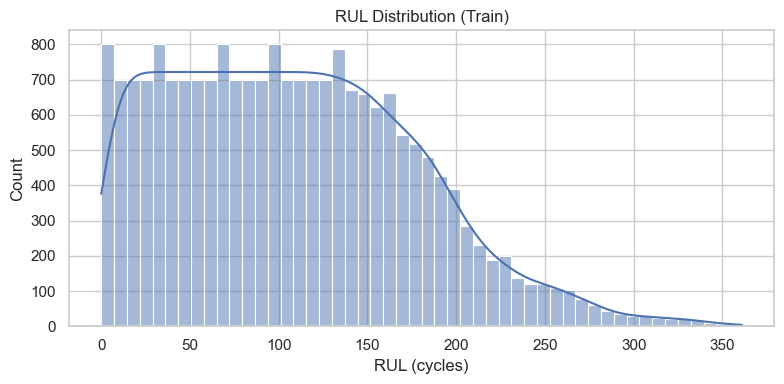

In [6]:
# RUL distribution
plt.figure(figsize=(8,4))
sns.histplot(train_df["RUL"], bins=50, kde=True)
plt.title("RUL Distribution (Train)")
plt.xlabel("RUL (cycles)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


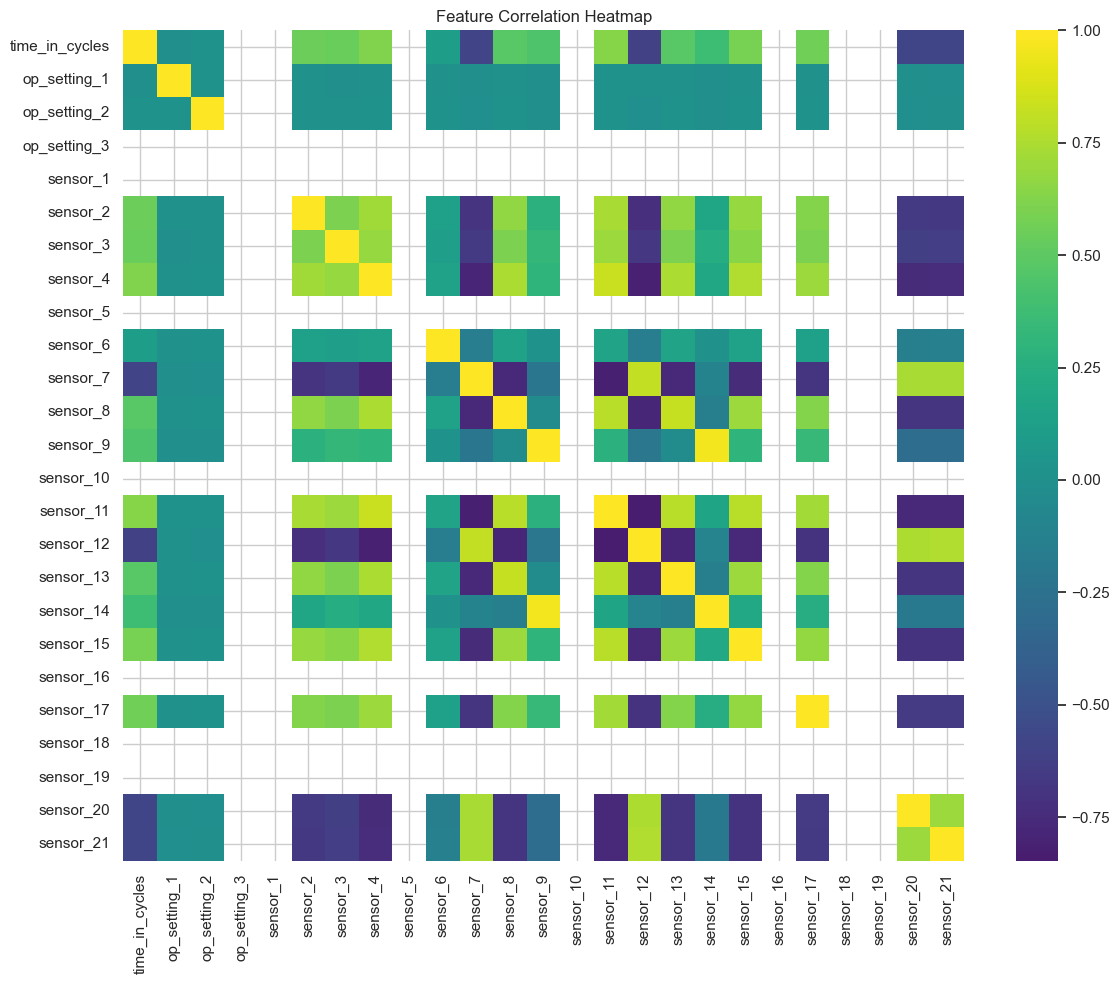

In [7]:
# Feature correlations (subset for readability)
# Exclude identifiers and target for correlation heatmap
feature_cols = [c for c in train_df.columns if c not in {"unit_number", "RUL"}]

corr = train_df[feature_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="viridis", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()
